In [1]:
import pandas as pd
import numpy as np
import gc

/home/oleg/anaconda36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
train = pd.read_csv('datasets/tc/dataset/train/subs_csi_train.csv', sep=';')
test = pd.read_csv('datasets/tc/dataset/test/subs_csi_test.csv', sep=';')

In [3]:
bs_avg_kpi_mean  = pd.read_csv('datasets/tc/dataset/bs_avg_kpi_mean.csv')
bs_chnn_kpi_mean = pd.read_csv('datasets/tc/dataset/bs_chnn_kpi_mean.csv')

In [4]:
subs_bs_consumption_train = pd.read_csv('datasets/tc/dataset/train/subs_bs_consumption_train.csv', sep=';', decimal=',')
subs_bs_consumption_test  = pd.read_csv('datasets/tc/dataset/test/subs_bs_consumption_test.csv', sep=';', decimal=',')
subs_bs_consumption = subs_bs_consumption_train.append(subs_bs_consumption_test)
subs_bs_consumption.head()

,SK_ID,CELL_LAC_ID,MON,SUM_MINUTES,SUM_DATA_MB,SUM_DATA_MIN
0,1827,240277,01.03,0.000000,0.000002,0.000234
1,1827,355195,01.03,0.000072,0.000000,0.000000
2,1827,238554,01.04,0.000000,0.000019,0.000326
3,1827,350978,01.04,0.016576,0.002260,0.004329
4,1827,315010,01.04,0.012755,0.001186,0.002491


In [5]:
bs_avg_kpi_mean.head()

,CELL_LAC_ID,CELL_AVAILABILITY_2G,CELL_AVAILABILITY_3G,CELL_AVAILABILITY_4G,CSSR_2G,CSSR_3G,ERAB_PS_BLOCKING_RATE_LTE,ERAB_PS_BLOCKING_RATE_PLMN_LTE,ERAB_PS_DROP_RATE_LTE,HSPDSCH_CODE_UTIL_3G,...,TCH_DROP_RATE_2G,UTIL_BRD_CPU_3G,UTIL_CE_DL_3G,UTIL_CE_HW_DL_3G,UTIL_CE_UL_3G,UTIL_SUBUNITS_3G,UL_VOLUME_LTE,DL_VOLUME_LTE,TOTAL_DL_VOLUME_3G,TOTAL_UL_VOLUME_3G
0,1,1.0,1.0,NaN,NaN,0.9440,NaN,NaN,NaN,NaN,...,NaN,NaN,0.041,NaN,NaN,NaN,NaN,NaN,0.07916,0.02711
1,2,NaN,1.0,NaN,NaN,0.9375,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01291,0.00868
2,3,NaN,NaN,NaN,NaN,NaN,0.1307,0.1255,0.01859,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00523,0.04602,NaN,NaN
3,4,1.0,1.0,0.02773,0.931,NaN,NaN,NaN,NaN,NaN,...,0.000654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1.0,1.0,NaN,NaN,0.9453,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.14830,0.02745


In [6]:
bs_chnn_kpi_mean.tail()

,CELL_LAC_ID,AVEUSERNUMBER,AVEUSERNUMBER_PLMN,AVR_DL_HSPA_USER_3G,AVR_DL_R99_USER_3G,AVR_DL_USER_3G,AVR_DL_USER_LTE,AVR_TX_POWER_3G,AVR_UL_HSPA_USER,AVR_UL_R99_USER,...,RELATIVE_RBU_USED_DL,RELATIVE_RBU_USED_UL,RELATIVE_TX_POWER_3G,UL_AVR_THROUGHPUT_3G,UL_AVR_THROUGHPUT_LTE,UL_AVR_THROUGHPUT_R99,UL_MEAN_USER_THROUGHPUT_LTE,UL_MEAN_USER_THROUGHPUT_HS3G,UL_MEAN_USER_THROUGHPUT_PLTE,UL_MEAN_USER_THROUGHPUT_REL93G
331970,510465,NaN,NaN,0.01091,NaN,NaN,NaN,0.1614,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331971,510466,NaN,NaN,0.04626,NaN,NaN,NaN,0.1772,0.02150,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.000545,NaN,NaN
331972,510467,NaN,NaN,0.03220,0.000121,0.03017,NaN,0.1685,0.02970,0.02003,...,NaN,NaN,0.0,0.001222,NaN,0.009140,NaN,0.000285,NaN,0.000732
331973,510468,NaN,NaN,0.09326,0.000974,0.08750,NaN,0.1890,0.07684,0.02022,...,NaN,NaN,0.0,0.004593,NaN,0.007275,NaN,0.000309,NaN,NaN
331974,510471,0.00099,0.000256,NaN,NaN,NaN,0.001169,NaN,NaN,NaN,...,0.137,0.0081,NaN,NaN,0.000032,NaN,0.000245,NaN,0.01752,NaN


In [7]:
df = subs_bs_consumption.merge(bs_avg_kpi_mean, on='CELL_LAC_ID', how='left')

In [8]:
df = df.merge(bs_chnn_kpi_mean, on='CELL_LAC_ID', how='left')

In [9]:
means = df.drop(['MON','CELL_LAC_ID'], axis=1).groupby('SK_ID', as_index=False).mean()

In [10]:
means.head()

,SK_ID,SUM_MINUTES,SUM_DATA_MB,SUM_DATA_MIN,CELL_AVAILABILITY_2G,CELL_AVAILABILITY_3G,CELL_AVAILABILITY_4G,CSSR_2G,CSSR_3G,ERAB_PS_BLOCKING_RATE_LTE,...,RELATIVE_RBU_USED_DL,RELATIVE_RBU_USED_UL,RELATIVE_TX_POWER_3G,UL_AVR_THROUGHPUT_3G,UL_AVR_THROUGHPUT_LTE,UL_AVR_THROUGHPUT_R99,UL_MEAN_USER_THROUGHPUT_LTE,UL_MEAN_USER_THROUGHPUT_HS3G,UL_MEAN_USER_THROUGHPUT_PLTE,UL_MEAN_USER_THROUGHPUT_REL93G
0,1,0.000347,0.000656,0.001265,0.998079,0.999483,1.000000,NaN,0.941658,0.001550,...,0.274667,0.022659,0.0,NaN,0.000056,NaN,0.000381,0.001063,0.027267,0.000102
1,2,0.000554,0.000047,0.004205,1.000000,0.999815,0.027730,0.929738,0.944285,0.000986,...,0.565243,0.058096,0.0,0.002092,0.000069,0.003983,0.000640,0.000260,0.045899,0.000781
2,3,0.004911,0.000398,0.060658,1.000000,1.000000,0.027731,0.927569,0.944500,0.001046,...,0.640325,0.056430,0.0,0.003339,0.000047,0.011876,0.000378,0.000262,0.026953,0.000780
3,4,0.005607,0.000000,0.000000,1.000000,1.000000,0.027725,0.930527,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.000842,0.000871,0.004767,0.998890,0.999140,1.000000,NaN,0.939839,0.003451,...,0.500548,0.063975,0.0,NaN,0.000044,NaN,0.000168,0.001088,0.012085,0.000238


In [11]:
train = train.merge(means, on='SK_ID', how='left')
test = test.merge(means, on='SK_ID', how='left')

In [12]:
X_train = train.drop(['CSI','CONTACT_DATE'], axis=1)
y_train = train['CSI']

X_test = test.drop(['CONTACT_DATE'], axis=1)

In [13]:
from sklearn.model_selection import train_test_split

X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

X_tra.shape, X_val.shape

/home/oleg/anaconda36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/oleg/anaconda36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/oleg/anaconda36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/oleg/anaconda36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


((2111, 79), (2111, 79))

In [15]:
import lightgbm as lgb

clf = lgb.LGBMRegressor().fit(X_tra.fillna(0), y_tra)

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(clf).fit(X_val.fillna(0), y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())

Weight,Feature
0.0279 ± 0.0159,CSSR_3G
0.0108 ± 0.0087,SUM_DATA_MIN
0.0069 ± 0.0025,UL_AVR_THROUGHPUT_R99
0.0063 ± 0.0079,SK_ID
0.0058 ± 0.0074,SUM_MINUTES
0.0051 ± 0.0019,UL_VOLUME_LTE
0.0048 ± 0.0092,PSSR_2G
0.0043 ± 0.0080,RBU_USED_UL
0.0040 ± 0.0037,AVR_DL_USER_3G
0.0039 ± 0.0052,CSSR_2G


In [20]:
selected = eli5.explain_weights_df(perm, feature_names = X_val.columns.tolist())
features_selected = selected[selected['weight'] > 1.05 * selected['std']]['feature'].values
len(X_val.columns), len(features_selected), features_selected

(79,
 19,
 array(['CSSR_3G', 'UL_AVR_THROUGHPUT_R99', 'SK_ID', 'RAB_PS_DROP_RATE_3G',
        'AVR_DL_USER_3G', 'UL_VOLUME_LTE', 'SUM_DATA_MB',
        'ERAB_PS_BLOCKING_RATE_PLMN_LTE', 'RBU_USED_UL', 'AVR_UL_USER_3G',
        'DL_AVR_THROUGHPUT_LTE', 'PART_MCS_QPSK_LTE', 'AVR_UL_HSPA_USER',
        'CSSR_2G', 'UTIL_CE_DL_3G', 'RELATIVE_RBU_USED_UL',
        'AVEUSERNUMBER', 'DL_MEAN_USER_THROUGHPUT_LTE', 'RBU_USED_DL'],
       dtype=object))

In [22]:
import lightgbm as lgb
from sklearn.model_selection import KFold, StratifiedKFold
random_state = 42

params = {
    'objective' : 'binary',
    'metric': 'auc',
    }
n_fold = 4
n_estimators = 50000
nthread = 2
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=random_state)
model = lgb.LGBMRegressor(**params, n_estimators = n_estimators, nthread = nthread, n_jobs = -1)

In [23]:
prediction = np.zeros(X_test.shape[0])

for fold_n, (train_index, test_index) in enumerate(folds.split(X_train[features_selected], y_train)):
    print('Fold:', fold_n)
    X_tr, X_va = X_train[features_selected].iloc[train_index], X_train[features_selected].iloc[test_index]
    y_tr, y_va = y_train.iloc[train_index], y_train.iloc[test_index]

    model.fit(X_tr, y_tr, 
            eval_set=[(X_tr, y_tr), (X_va, y_va)], eval_metric='auc', 
            verbose=5, early_stopping_rounds=50)
    
    y_pred = model.predict(X_test[features_selected], num_iteration=model.best_iteration_)
    prediction += y_pred
    
prediction /= n_fold

Fold: 0
Training until validation scores don't improve for 50 rounds.
[5]	training's auc: 0.785697	valid_1's auc: 0.531711
[10]	training's auc: 0.839289	valid_1's auc: 0.516697
[15]	training's auc: 0.870156	valid_1's auc: 0.513128
[20]	training's auc: 0.889174	valid_1's auc: 0.512626
[25]	training's auc: 0.903497	valid_1's auc: 0.504033
[30]	training's auc: 0.918386	valid_1's auc: 0.501268
[35]	training's auc: 0.92696	valid_1's auc: 0.507109
[40]	training's auc: 0.933227	valid_1's auc: 0.501849
[45]	training's auc: 0.938392	valid_1's auc: 0.505493
[50]	training's auc: 0.942718	valid_1's auc: 0.505411
Early stopping, best iteration is:
[4]	training's auc: 0.771783	valid_1's auc: 0.539183
Fold: 1
Training until validation scores don't improve for 50 rounds.
[5]	training's auc: 0.801493	valid_1's auc: 0.531458
[10]	training's auc: 0.839132	valid_1's auc: 0.542057
[15]	training's auc: 0.880206	valid_1's auc: 0.54499
[20]	training's auc: 0.899061	valid_1's auc: 0.539624
[25]	training's auc:

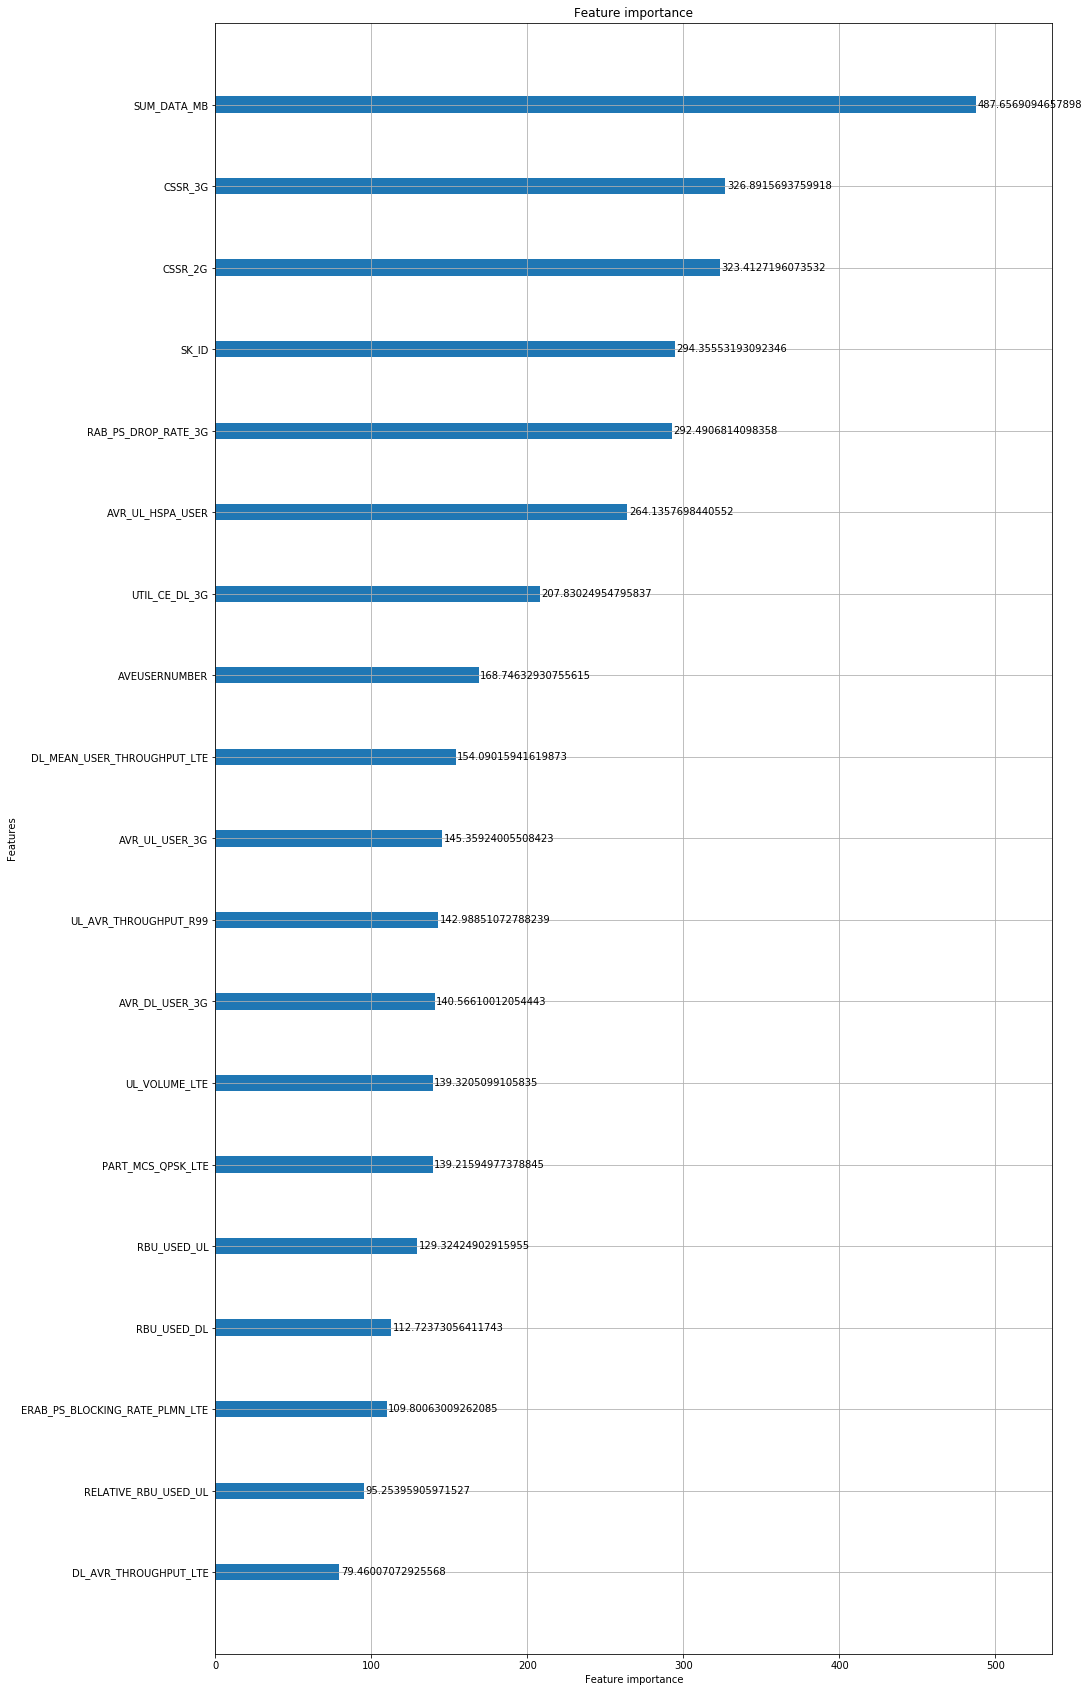

In [24]:
%matplotlib inline
lgb.plot_importance(model, importance_type='gain', figsize=(15,30))

In [25]:
pd.DataFrame(prediction).to_csv('telecomcup.csv',index=False, header=None)